# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Loading the dataset

In [4]:
valve = pd.read_csv("C:/Users/DELL/Downloads/Intern_database.csv",delimiter=",")
valve.describe()

,Slipstick,Min/Max Temperature(Celsius),D_byte(0),D_byte(1),D_byte(2),D_byte(3),M_byte(0),M_byte(1),M_byte(2),M_byte(3),P_Bit_0,strokes,Operating hours
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,52.643429,36.400000,4.149143,4.742857,4.466000,4.533143,4.844000,4.743143,4.844000,4.810286,4.500000,3.311143,144.028571
std,40.226044,53.367037,1.981086,3.527082,2.477229,2.550184,3.429669,3.445150,3.429669,3.492495,2.549971,3.748975,84.710749
min,0.000000,-97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,16.350000,1.250000,2.850000,2.355000,2.850000,2.530000,2.850000,2.850000,2.850000,2.530000,2.350000,1.265000,86.000000
50%,47.000000,45.000000,4.200000,4.200000,4.200000,4.500000,4.500000,4.200000,4.500000,4.500000,4.700000,2.180000,125.000000
75%,77.000000,74.600000,5.415000,6.045000,5.600000,5.870000,5.990000,5.790000,5.990000,6.045000,6.450000,4.015000,189.000000
max,141.000000,116.000000,9.800000,19.700000,11.200000,11.200000,19.700000,19.700000,19.700000,19.700000,9.700000,19.700000,350.000000


In [5]:
valve.head()

,Slipstick,Min/Max Temperature(Celsius),D_byte(0),D_byte(1),D_byte(2),D_byte(3),M_byte(0),M_byte(1),M_byte(2),M_byte(3),P_Bit_0,strokes,Meaning,Operating hours
0,0.0,-50.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,fail safe,10
1,1.0,-43.0,1.1,1.20,1.1,1.20,1.1,1.1,1.1,1.20,0.1,0.1,fail safe,20
2,2.0,-33.0,2.1,1.23,2.1,1.23,2.1,2.1,2.1,1.23,0.5,0.3,fail safe,30
3,3.0,-12.0,3.2,3.20,3.2,3.20,3.2,3.2,3.2,3.20,1.0,0.2,request on-site,50
4,4.0,-3.0,4.5,4.50,4.5,4.50,4.5,4.5,4.5,4.50,1.2,0.7,request on-site,60


Text(0.5, 1, 'PLOT BETWEEN OPERATING HOURS Vs STROKES')

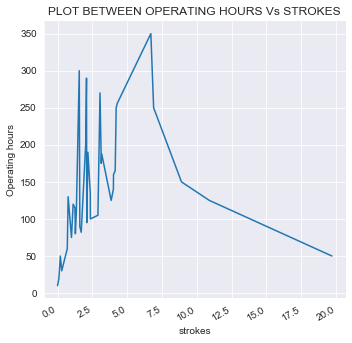

In [80]:
g = sns.relplot(x="strokes", y="Operating hours", kind="line", data=valve)
g.fig.autofmt_xdate()
plt.title('PLOT BETWEEN OPERATING HOURS Vs STROKES')

In [8]:
df = valve.copy()
df.head()

,Slipstick,Min/Max Temperature(Celsius),D_byte(0),D_byte(1),D_byte(2),D_byte(3),M_byte(0),M_byte(1),M_byte(2),M_byte(3),P_Bit_0,strokes,Meaning,Operating hours
0,0.0,-50.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,fail safe,10
1,1.0,-43.0,1.1,1.20,1.1,1.20,1.1,1.1,1.1,1.20,0.1,0.1,fail safe,20
2,2.0,-33.0,2.1,1.23,2.1,1.23,2.1,2.1,2.1,1.23,0.5,0.3,fail safe,30
3,3.0,-12.0,3.2,3.20,3.2,3.20,3.2,3.2,3.2,3.20,1.0,0.2,request on-site,50
4,4.0,-3.0,4.5,4.50,4.5,4.50,4.5,4.5,4.5,4.50,1.2,0.7,request on-site,60


This shows all the index values of P_Bit_0 which is represented by the diagnostic values of operation at the site.
It is depicted in boolean form.

In [9]:
a = (df.P_Bit_0>7)
print(a)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31     True
32     True
33     True
34     True
Name: P_Bit_0, dtype: bool


It displays invalid for all the temperature values greater than 100

In [10]:
df = df[df['Min/Max Temperature(Celsius)'] > 100]
w = df.values
for i in range(df.shape[0]):
    for j in  range(df.shape[1]):
        print(w[i][j],end=" ")
    print()   

11.0 111.0 6.23 6.9 7.8 7.8 6.9 6.9 6.9 6.9 7.9 6.9 not valid 250 
141.0 105.0 4.9 8.9 9.3 9.3 8.9 8.9 8.9 8.9 8.9 8.9 not valid 150 
111.0 116.0 9.8 19.7 11.2 11.2 19.7 19.7 19.7 19.7 9.7 19.7 not valid 50 


In [11]:
t = valve.copy()
t.head()

,Slipstick,Min/Max Temperature(Celsius),D_byte(0),D_byte(1),D_byte(2),D_byte(3),M_byte(0),M_byte(1),M_byte(2),M_byte(3),P_Bit_0,strokes,Meaning,Operating hours
0,0.0,-50.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,fail safe,10
1,1.0,-43.0,1.1,1.20,1.1,1.20,1.1,1.1,1.1,1.20,0.1,0.1,fail safe,20
2,2.0,-33.0,2.1,1.23,2.1,1.23,2.1,2.1,2.1,1.23,0.5,0.3,fail safe,30
3,3.0,-12.0,3.2,3.20,3.2,3.20,3.2,3.2,3.2,3.20,1.0,0.2,request on-site,50
4,4.0,-3.0,4.5,4.50,4.5,4.50,4.5,4.5,4.5,4.50,1.2,0.7,request on-site,60


[Text(0, 0, '0.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.8'),
 Text(0, 0, '10.1'),
 Text(0, 0, '11.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '20.7'),
 Text(0, 0, '22.8'),
 Text(0, 0, '25.0'),
 Text(0, 0, '33.0'),
 Text(0, 0, '35.0'),
 Text(0, 0, '44.3'),
 Text(0, 0, '45.0'),
 Text(0, 0, '46.0'),
 Text(0, 0, '47.0'),
 Text(0, 0, '50.0'),
 Text(0, 0, '56.0'),
 Text(0, 0, '60.7'),
 Text(0, 0, '62.0'),
 Text(0, 0, '67.0'),
 Text(0, 0, '71.9'),
 Text(0, 0, '74.92'),
 Text(0, 0, '76.0'),
 Text(0, 0, '78.0'),
 Text(0, 0, '87.5'),
 Text(0, 0, '89.8'),
 Text(0, 0, '98.2'),
 Text(0, 0, '99.8'),
 Text(0, 0, '111.0'),
 Text(0, 0, '120.0'),
 Text(0, 0, '131.0'),
 Text(0, 0, '141.0')]

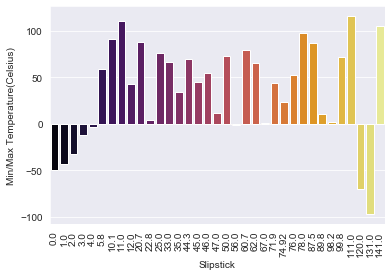

In [87]:
chart=sns.barplot(x='Slipstick',y = 'Min/Max Temperature(Celsius)',data=valve,palette = 'inferno' )
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

# Relation of Operating hours with Temperature, Slipstick, strokes

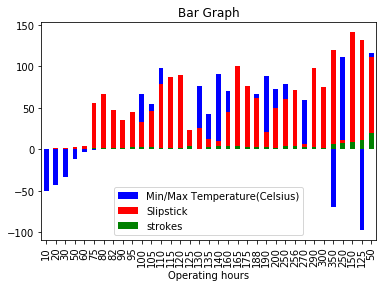

In [13]:
ax = plt.gca()
valve.plot(kind='bar', y='Min/Max Temperature(Celsius)', x='Operating hours', ax=ax, color='blue')
valve.plot(kind='bar', y='Slipstick', x='Operating hours', color='red', ax=ax)
valve.plot(kind='bar', y='strokes', x='Operating hours', color='green', ax=ax)
plt.title('Bar Graph')

plt.show()


# M_bit with Operating hours

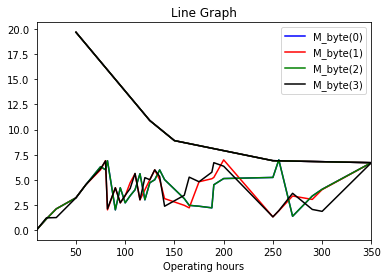

In [14]:
ax = plt.gca()
valve.plot(kind='line', y='M_byte(0)', x='Operating hours', ax=ax, color='blue')
valve.plot(kind='line', y='M_byte(1)', x='Operating hours', color='red', ax=ax)
valve.plot(kind='line', y='M_byte(2)', x='Operating hours', color='green', ax=ax)
valve.plot(kind='line', y='M_byte(3)', x='Operating hours', color='black', ax=ax)
plt.title('Line Graph')

plt.show()

In [15]:
t=t[t['Meaning']=='not valid']
t=t[t['P_Bit_0']>7]
X=t.values
for i in range(t.shape[0]):
    for j in range(t.shape[1]):
        print(X[i][j],end=" ")
    print()

120.0 -70.0 5.78 6.7 5.6 5.6 6.7 6.7 6.7 6.7 7.3 6.7 not valid 350 
11.0 111.0 6.23 6.9 7.8 7.8 6.9 6.9 6.9 6.9 7.9 6.9 not valid 250 
141.0 105.0 4.9 8.9 9.3 9.3 8.9 8.9 8.9 8.9 8.9 8.9 not valid 150 
131.0 -97.0 5.6 10.9 9.5 9.5 10.9 10.9 10.9 10.9 7.5 10.9 not valid 125 
111.0 116.0 9.8 19.7 11.2 11.2 19.7 19.7 19.7 19.7 9.7 19.7 not valid 50 


In [3]:
pilot=pd.read_csv("C:/Users/DELL/Downloads/offsetdata.csv",delimiter=",")
pilot

,setpoint,flow,value,offset difference,status
0,300,305,50,55,good condition
1,300,305,50,55,good condition
2,300,305,50,42,out of range
3,300,305,50,45,good condition
4,300,305,50,57,out of range
5,300,305,50,56,out of range
6,300,305,50,78,immediate action
7,200,230,40,45,good condition
8,250,258,42,43,excellent
9,450,451,44,67,precaution to be taken


In [29]:
pie_status = pilot.groupby('status').agg('count')
pie_offset = pilot.groupby('value').agg('count')

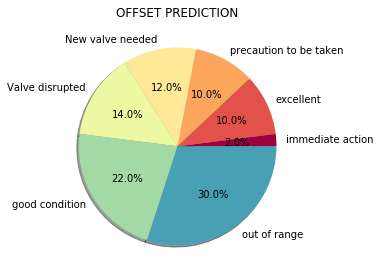

In [34]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

import matplotlib.pyplot as plt
%matplotlib inline

status_labels = pie_status.value.sort_values().index
status_counts = pie_status.value.sort_values()

offset_labels = pie_offset.status.sort_values().index
offset_counts = pie_offset.status.sort_values()


plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]


plt.subplot(the_grid[0, 1], aspect=1, title='OFFSET PREDICTION')

status_pie = plt.pie(status_counts, labels=status_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [41]:
df=pilot.copy()
df=pd.DataFrame(df)
df["range"]=df["value"]-df["offset difference"]
df["temperature"]=df["value"]+5
df

,setpoint,flow,value,offset difference,status,range,temperature
0,300,305,50,55,good condition,-5,55
1,300,305,50,55,good condition,-5,55
2,300,305,50,42,out of range,8,55
3,300,305,50,45,good condition,5,55
4,300,305,50,57,out of range,-7,55
5,300,305,50,56,out of range,-6,55
6,300,305,50,78,immediate action,-28,55
7,200,230,40,45,good condition,-5,45
8,250,258,42,43,excellent,-1,47
9,450,451,44,67,precaution to be taken,-23,49


# The pie chart depicts the status bits of the valve by converting the bits into percentage

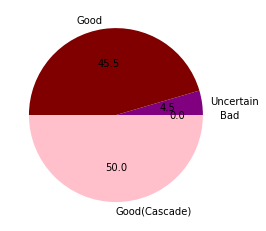

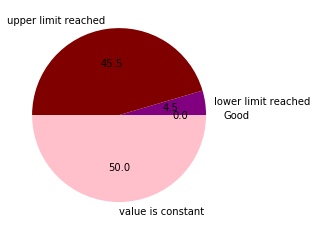

In [16]:
quality = [0,1,10,11]
status  = ['Bad','Uncertain','Good','Good(Cascade)']
limit = ['Good','lower limit reached','upper limit reached','value is constant']
colors = ["red","purple","maroon","pink"]
explode = [0.1,0,0,0]
plt.pie(quality,colors = colors,explode=explode,labels = status,autopct="%.1f")  
plt.show()
plt.pie(quality,colors = colors,explode=explode,labels = limit,autopct = "%.1f")
plt.show()

In [17]:
pie_p = valve.groupby('P_Bit_0').agg('count')
pie_m = valve.groupby('Meaning').agg('count')

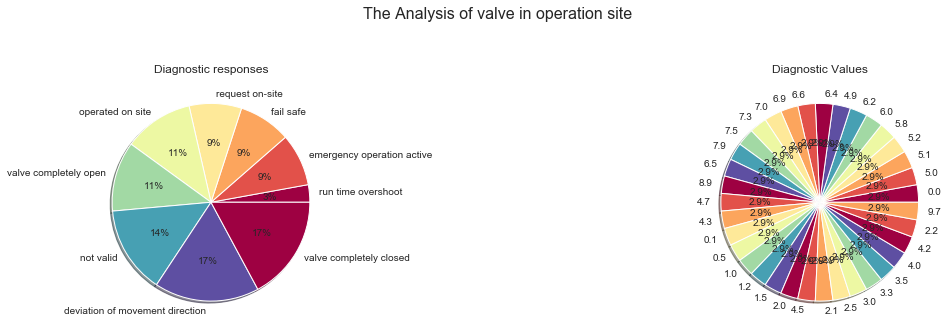

In [85]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

import matplotlib.pyplot as plt
%matplotlib inline

p_labels = pie_p.Meaning.sort_values().index
p_counts = pie_p.Meaning.sort_values()

m_labels = pie_m.P_Bit_0.sort_values().index
m_counts = pie_m.P_Bit_0.sort_values()


plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]


plt.subplot(the_grid[0, 1], aspect=1, title='Diagnostic Values')

p_pie = plt.pie(p_counts, labels=p_labels, autopct='%1.1f%%', shadow=True, colors=colors)


plt.subplot(the_grid[0, 0], aspect=1, title='Diagnostic responses')

m_pie = plt.pie(m_counts,labels=m_labels, autopct='%.0f%%', shadow=True, colors=colors)

plt.suptitle('The Analysis of valve in operation site', fontsize=16)


plt.show()


Loading of another dataset (Maintenance)

In [19]:
maintenance = pd.read_csv("C:/Users/DELL/Downloads/mainte.csv",delimiter=",")
maintenance.head()

,datetime,machineID,component
0,7/16/2014 6:00:00 AM,1,comp2
1,7/16/2014 6:00:00 AM,1,comp4
2,7/31/2014 6:00:00 AM,1,comp3
3,12/13/2014 6:00:00 AM,1,comp1
4,7/16/2014 6:00:00 AM,1,comp4


In [20]:
maintenance['datetime'] = pd.to_datetime(maintenance['datetime'], format="%m/%d/%Y %I:%M:%S %p")
maintenance['component'] = maintenance['component'].astype('category')

print('Total number of maintenance records: {}'.format(len(maintenance.index)))
print("Dates range from {} to {}".format(str(maintenance["datetime"].min()),str(maintenance["datetime"].max())))

Total number of maintenance records: 215
Dates range from 2014-06-16 06:00:00 to 2015-12-31 06:00:00


In [21]:
pd.concat([maintenance.head(5),maintenance.tail(5)])

,datetime,machineID,component
0,2014-07-16 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2014-07-16 06:00:00,1,comp4
210,2014-08-15 06:00:00,7,comp2
211,2014-11-28 06:00:00,7,comp4
212,2015-01-24 06:00:00,7,comp2
213,2015-01-24 06:00:00,7,comp4
214,2015-01-24 06:00:00,7,comp1


# Number of components in the Dataset 

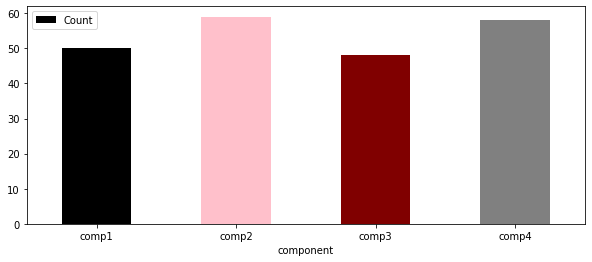

In [22]:
colors = ["black","pink","maroon","grey"]
count = maintenance.groupby("component").count().reset_index().rename(index=str,columns={"machineID":"Count"})
count.plot.bar(x='component',y='Count',color=colors,rot=0,figsize=(10,4));

Loading another dataset to depict failures in the components with the date as well as time

In [23]:
failures = pd.read_csv("C:/Users/DELL/Downloads/failures.csv",delimiter=",")
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%d-%m-%Y %H:%M")

print('Total number of failures: {}'.format(len(failures.index)))
print(failures)

Total number of failures: 10
             datetime  machine_id failure
0 2015-01-06 06:00:00           1   comp1
1 2015-02-07 06:05:00           1   comp3
2 2015-03-05 06:00:00           1   comp4
3 2015-04-07 06:01:00           1   comp2
4 2015-06-06 06:07:00           1   comp1
5 2015-07-05 06:02:00           1   comp1
6 2015-09-06 06:11:00           1   comp2
7 2015-11-05 06:00:00           1   comp3
8 2016-01-06 06:10:00           1   comp4
9 2016-02-06 06:00:00           1   comp3


It counts the failures due to each component and represents it in the form of a bar graph

Text(0.5, 1.0, 'Failures due to each component')

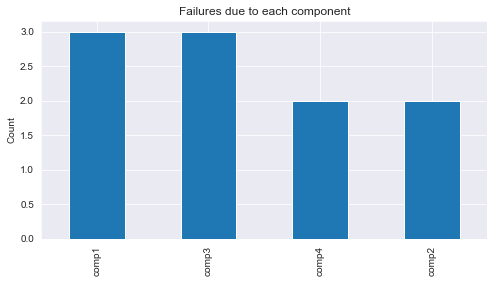

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Failures due to each component')

# Relation of D_Byte(0), M_Byte(0) with P_Bit

In [1]:
from mpl_toolkits import mplot3d

In [45]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-3, 3, 19)
y = np.linspace(-5, 5, 19)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

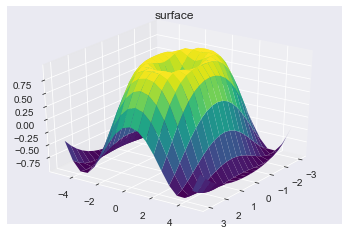

In [46]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.view_init(30, 35)

# Relation of D_Byte(1), M_Byte(1) with P_Bit

In [49]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-4, 4, 20)
y = np.linspace(-5, 5, 20)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

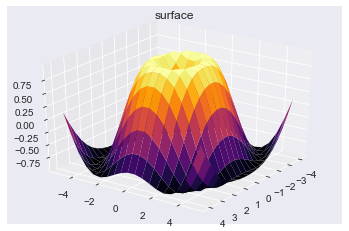

In [50]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='inferno', edgecolor='none')
ax.set_title('surface');
ax.view_init(30, 35)

# Relation of D_Byte(2), M_Byte(2) with P_Bit

In [51]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-4, 5, 11)
y = np.linspace(-3, 2, 19)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

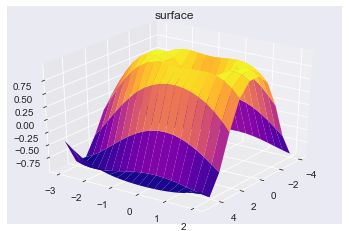

In [52]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='plasma', edgecolor='none')
ax.set_title('surface');
ax.view_init(30, 35)

# Relation of D_Byte(3), M_Byte(3) with P_Bit

In [55]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-5, 5, 11)
y = np.linspace(-5, 6, 20)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

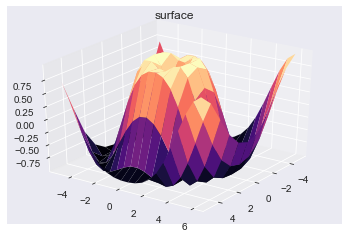

In [56]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='magma', edgecolor='none')
ax.set_title('surface');
ax.view_init(30, 35)

# Modelling

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words = 'english')
dtm = vect.fit_transform(valve.Meaning)

Splitting data into train and test

In [65]:
from sklearn.model_selection import train_test_split

X = dtm
y = valve.P_Bit_0

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

Random Forest Regressor uses many randomized decision trees to predict the outcome.
It uses both classification as well as regression but in the code we have used regression.

In [66]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [67]:
from sklearn.metrics import r2_score, mean_squared_error

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print('Root mean Score Training: {}'.format(r2_score(y_train, pred_train)))
print('Root mean Score Testing: {}'.format(r2_score(y_test, pred_test)))

Root mean Score Training: 0.9668172804763234
Root mean Score Testing: 0.8513073984128021


# VISUAL REPRESENTATION OF TRAINING AND TESTING DATA PREDICTION ACCURACY

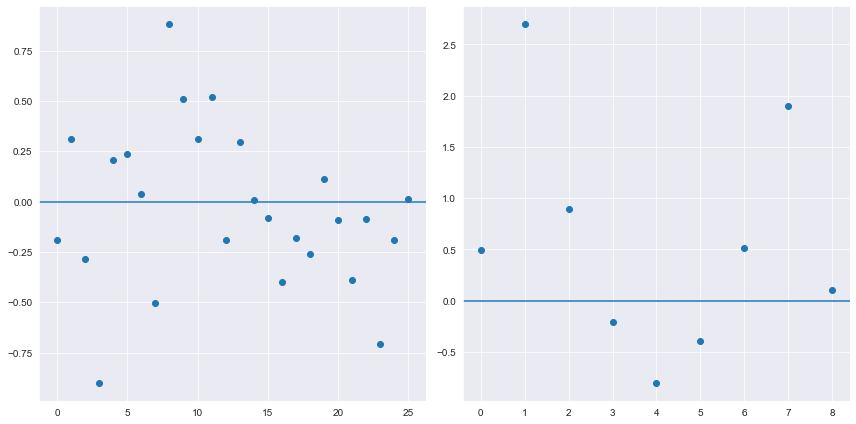

In [68]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(pred_train)), y_train - pred_train,'o')
plt.axhline(0)
plt.subplot(1,2,2)
plt.plot(np.arange(len(pred_test)), y_test - pred_test,'o')
plt.axhline(0)
plt.tight_layout()

# LINEAR REGRESSION

In [69]:
y = valve["Min/Max Temperature(Celsius)"]
X = valve[['Slipstick','M_byte(0)','P_Bit_0','strokes','Operating hours']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

Training the model

In [70]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

-2.1003660532232864


In [71]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
print(ranked_suburbs)

                 Coefficient
P_Bit_0            37.952993
M_byte(0)           4.982089
Operating hours    -0.506749
Slipstick          -0.779527
strokes           -14.155296


The coefficient obtained depicts that it has average-good coorelation target,hence a good model is expected

In [72]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
print('Root mean Score Training: {}'.format(r2_score(y_train, pred_train)))
print('Root mean Score Testing: {}'.format(r2_score(y_test, pred_test)))

Root mean Score Training: 0.4752444628925715
Root mean Score Testing: -0.07742428021390713


#                                      Creating the Best Fit Line

In [73]:
new = pd.Series(list(y_test)).values
new_list =[]
for i in range(len(new)):
    new_list.insert(i,new[i])
new_list = [float(q) for q in new_list]
new_list = [round(q) for q in new_list]
pred_test = [float(q) for q in pred_test]
pred_test = [round(q) for q in pred_test]

In [75]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer/denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return(a,b)
a, b = best_fit(new_list, pred_test)

best fit line:
y = 20.81 + 0.34x


#                                              VISUAL REPRESENTATION OF THE BEST FIT LINE

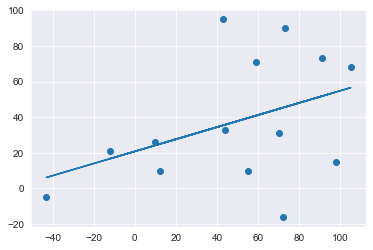

In [76]:
plt.scatter(new_list, pred_test)
yfit = [a + b * xi for xi in new_list]
plt.plot(new_list, yfit)